In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('D1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              51766 non-null  int64 
 1   patient_nbr               51766 non-null  int64 
 2   race                      51766 non-null  object
 3   gender                    51766 non-null  object
 4   age                       51766 non-null  object
 5   weight                    51766 non-null  object
 6   admission_type_id         51766 non-null  int64 
 7   discharge_disposition_id  51766 non-null  int64 
 8   admission_source_id       51766 non-null  int64 
 9   time_in_hospital          51766 non-null  int64 
 10  payer_code                51766 non-null  object
 11  medical_specialty         51766 non-null  object
 12  num_lab_procedures        51766 non-null  int64 
 13  num_procedures            51766 non-null  int64 
 14  num_medications       

In [24]:
#Question 1

#Correcting data types for mismatched ones
#change and diabetesMed chenge from object to binary

print(df['change'].value_counts())
print(df['diabetesMed'].value_counts())

#Convert data type to int
change_map = {'Ch':1, 'No':0}
diabetesmed_map = {'Yes':1, 'No':0}

df['change'] = df['change'].map(change_map)
df['diabetesMed'] = df['diabetesMed'].map(diabetesmed_map)

Ch    26663
No    25103
Name: change, dtype: int64
Yes    40984
No     10782
Name: diabetesMed, dtype: int64


In [25]:
#Question 2.1

#New data frame with interval variables

df_quant = pd.DataFrame(df, columns=['time_in_hospital','num_lab_procedures','num_procedures','num_medications',
                                          'number_outpatient','number_emergency','number_inpatient','number_diagnoses'])

#Calculate skewness

for data in df_quant:
    difference = df_quant[data].mean() - df_quant[data].median()
    if difference > 0:
        print(f"{data} is positively skewed, with difference of {difference}.")
    else:
        print(f"{data} is negatively skewed, with difference of {difference}.")

time_in_hospital is positively skewed, with difference of 1.2373372483869725.
num_lab_procedures is negatively skewed, with difference of -1.1467951937565175.
num_procedures is positively skewed, with difference of 0.30821388556195184.
num_medications is positively skewed, with difference of 0.7358497855735422.
number_outpatient is positively skewed, with difference of 0.5128462697523472.
number_emergency is positively skewed, with difference of 0.2691728161341421.
number_inpatient is positively skewed, with difference of 0.6868794189236178.
number_diagnoses is negatively skewed, with difference of -1.071514121237878.


In [26]:
#Quesiton 2.2

#Missing values

print(df['race'].value_counts())
print("")
print(df['age'].value_counts())
print("")
print(df['weight'].value_counts())
print("")
print(df['medical_specialty'].value_counts())
print("")
print(df['payer_code'].value_counts())
print("")
print(df['chlorpropamide'].value_counts())



Caucasian          40388
AfricanAmerican     8070
Hispanic            1018
?                   1016
Other                896
Asian                378
Name: race, dtype: int64

[70-80)     12972
[60-70)     11618
[80-90)      9671
[50-60)      8482
[40-50)      4619
[30-40)      1717
[90-100)     1616
[20-30)       815
[10-20)       223
[0-10)         23
?              10
Name: age, dtype: int64

?            50431
[75-100)       542
[50-75)        347
[100-125)      309
[125-150)       72
[25-50)         29
[150-175)       18
[0-25)          11
[175-200)        5
>200             2
Name: weight, dtype: int64

?                                    32203
Emergency/Trauma                      5616
InternalMedicine                      3854
Family/GeneralPractice                1949
Cardiology                            1667
Surgery-General                       1326
Radiologist                           1070
Orthopedics                            681
Nephrology                             

In [27]:
#Question 2.2

#Missing values $ inconsistencies in diag_1, diag_2 and diag_3

for line in df['diag_1']:
    try:
        int(line)
    except:
        print(line)

250.12
250.6
250.8
250.8
250.92
250.02
250.7
V57
250.8
250.7
250.12
250.7
250.22
250.8
V54
250.8
250.42
250.11
250.41
250.11
250.1
250.8
250.82
250.82
250.8
250.6
250.81
250.8
250.6
250.7
250.1
250.82
V57
V57
250.03
250.8
V55
250.11
250.82
V57
250.11
250.6
250.6
250.11
250.2
V58
250.11
250.1
250.13
V57
250.1
250.7
250.02
250.1
250.1
250.8
250.1
V57
250.12
250.8
250.8
250.2
250.6
250.2
250.6
250.4
250.11
250.8
V57
250.6
250.1
250.8
V58
V57
250.8
250.6
250.02
250.82
250.11
250.8
250.8
250.6
250.11
250.4
250.6
250.12
250.6
250.82
250.42
250.6
250.6
V58
250.5
V55
250.8
V57
V57
V57
V57
250.12
250.6
250.6
250.6
250.6
250.8
250.8
250.42
250.7
250.8
250.11
250.8
250.02
250.8
V58
250.6
V57
250.6
250.02
250.2
250.8
250.02
250.02
V57
250.4
250.02
250.8
250.8
250.12
250.31
250.8
250.6
250.6
250.11
250.12
250.11
250.8
V58
250.2
V54
250.8
250.01
250.11
250.82
250.12
250.6
V57
250.11
250.02
V55
250.8
250.7
250.11
250.82
250.1
250.12
250.7
V58
250.13
250.82
250.7
250.1
250.6
250.6
250.6
250.82
250.11


In [28]:
#Question 2.2

#Identify outliers for interval variables

for variable in df_quant:
    count = 0
    outliers = set()
    q3 = df_quant[variable].describe()['75%']
    q1 = df_quant[variable].describe()['25%']
    iqr = float(q3) - float(q1)
    max_val = float(q3) + (1.5*iqr)
    min_val = float(q1) - (1.5*iqr)
    
    if min_val < 0:
        min_val = 0
    
    print(variable)
    print(f"min: {min_val}, max: {max_val}")
    
    for line in df_quant[variable]:
        if line > max_val or line < min_val:
            outliers.add(line)
            count += 1
            
    print(f"number of outliers: {count}")
    print(outliers)
    print("")

time_in_hospital
min: 0, max: 12.0
number of outliers: 977
{13, 14}

num_lab_procedures
min: 0, max: 95.5
number of outliers: 85
{132, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 111, 113, 114, 118, 121, 126}

num_procedures
min: 0, max: 5.0
number of outliers: 2873
{6}

num_medications
min: 0, max: 36.0
number of outliers: 1119
{37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 74, 75}

number_outpatient
min: 0.0, max: 0.0
number of outliers: 11191
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 42}

number_emergency
min: 0.0, max: 0.0
number of outliers: 7602
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 29, 37, 46, 54, 63, 64, 76}

number_inpatient
min: 0, max: 2.5
number of outliers: 3958
{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19}

number_dia

In [29]:
#Question 2.3 (a)

df1 = pd.DataFrame(df, columns=['gender', 'readmitted', 'time_in_hospital'])

df2 = df1.loc[df['gender'] == 'Female']

df2 = df2.loc[df2['readmitted'] == "<30"]

print(f"Avereage time stay in hospital: {df2['time_in_hospital'].mean()}")

Avereage time stay in hospital: 4.524752475247524


In [30]:
# Question2.3 (b)
df3 = pd.DataFrame (df, columns=['age', 'readmitted'])

#Fill missing values
df3['age'] = df3['age'].replace(['?'], df3['age'].mode()[0])

df3.loc[df3['readmitted'] == "<30"].value_counts().sort_values(ascending=False)

age       readmitted
[70-80)   <30           1435
[60-70)   <30           1274
[80-90)   <30           1130
[50-60)   <30            788
[40-50)   <30            471
[90-100)  <30            193
[30-40)   <30            187
[20-30)   <30            121
[10-20)   <30             15
dtype: int64

In [31]:
# Question2.3 (c)

df4 = df3.loc[df3['readmitted'] != 'NO'].value_counts()
df4.groupby(['age']).sum().sort_values(ascending=False)

age
[70-80)     6205
[60-70)     5348
[80-90)     4741
[50-60)     3693
[40-50)     2008
[30-40)      709
[90-100)     676
[20-30)      351
[10-20)       91
[0-10)         6
dtype: int64

In [32]:
# Question2.3 (d)

df5 = pd.DataFrame(df, columns=['race', 'readmitted'])

# fill missing values from 'race' with mode

df5['race'] = df5['race'].replace(['?'], df5['race'].mode()[0])

# locate values that match the condition

df6 = df5.loc[df5['readmitted'] != "NO"].value_counts()

df6.groupby(['race']).sum().sort_values(ascending=False).head(3)

race
Caucasian          19487
AfricanAmerican     3530
Other                347
dtype: int64

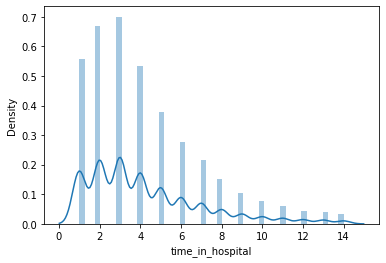

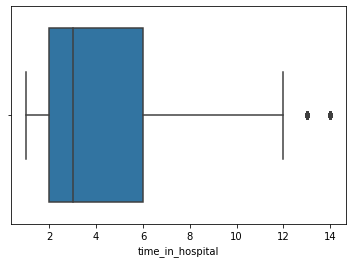

In [34]:
#Question 3.1 
g = sns.distplot(df['time_in_hospital'])
plt.show()
g = sns.boxplot(df['time_in_hospital'])

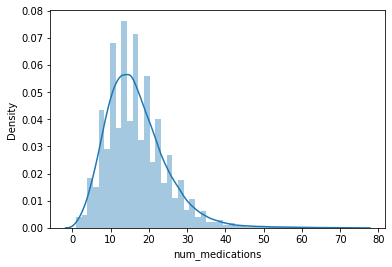

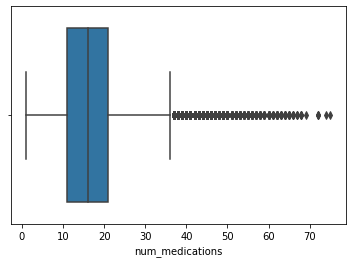

In [35]:
g = sns.distplot(df['num_medications'])
plt.show()
g = sns.boxplot(df['num_medications'])

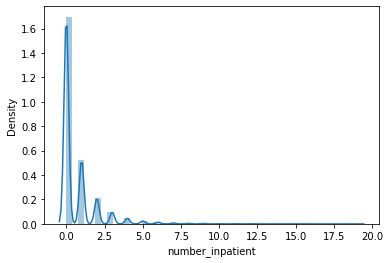

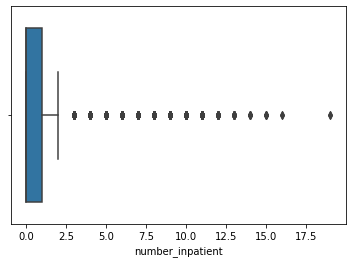

In [36]:
g = sns.distplot(df['number_inpatient'])
plt.show()
g = sns.boxplot(df['number_inpatient'])

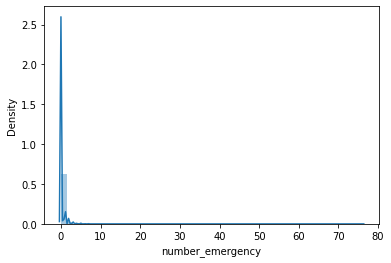

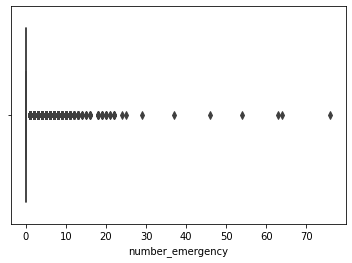

In [37]:
g = sns.distplot(df['number_emergency'])
plt.show()
g = sns.boxplot(df['number_emergency'])

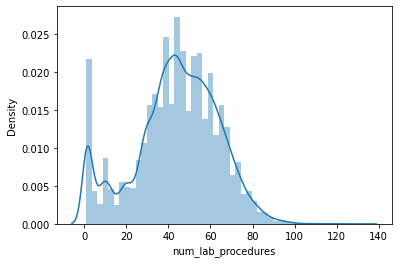

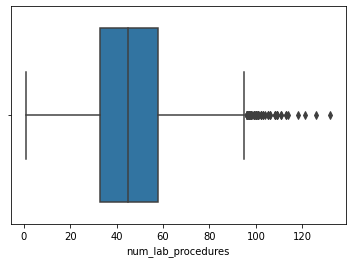

In [38]:
g = sns.distplot(df['num_lab_procedures'])
plt.show()
g = sns.boxplot(df['num_lab_procedures'])

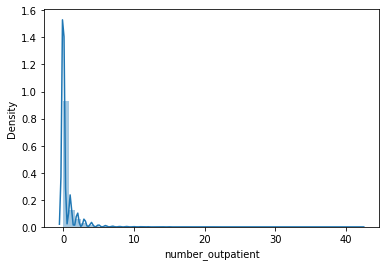

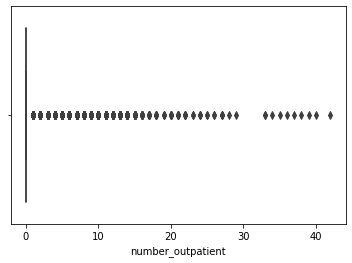

In [39]:
g = sns.distplot(df['number_outpatient'])
plt.show()
g = sns.boxplot(df['number_outpatient'])

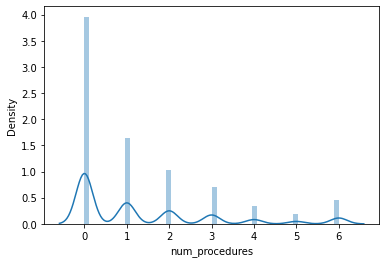

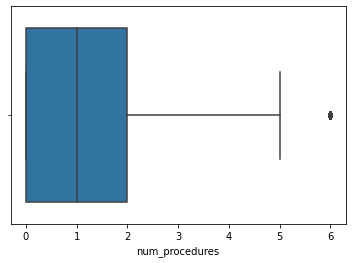

In [40]:
g = sns.distplot(df['num_procedures'])
plt.show()
g = sns.boxplot(df['num_procedures'])

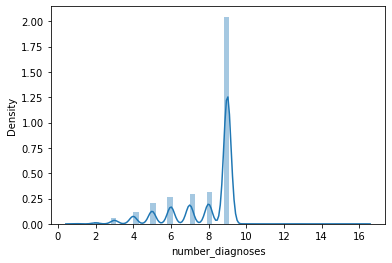

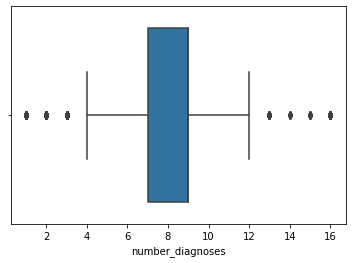

In [41]:
g = sns.distplot(df['number_diagnoses'])
plt.show()
g = sns.boxplot(df['number_diagnoses'])

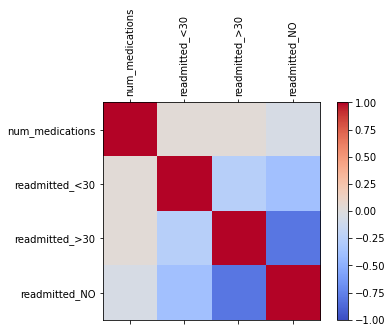

,num_medications,readmitted_<30,readmitted_>30,readmitted_NO
num_medications,1.000000,0.032790,0.034892,-0.053888
readmitted_<30,0.032790,1.000000,-0.256971,-0.377655
readmitted_>30,0.034892,-0.256971,1.000000,-0.797806
readmitted_NO,-0.053888,-0.377655,-0.797806,1.000000


In [46]:
#Question 3.2

import numpy as np

#Create new dataframe and use one hot encoding
df7 = pd.DataFrame(df, columns=['num_medications', 'readmitted'])
df7 = pd.get_dummies(df7)

#Visualisation of correlation

corr = df7.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df7.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df7.columns)
ax.set_yticklabels(df7.columns)
plt.show()

df7.corr()

In [49]:
#Quesiton 3.3

#To calculate correlation, all the variables should be converted to integers.

# 1. Drop irrelvant columns

df = df.drop(columns=['encounter_id','patient_nbr','payer_code'])

# 2. Drop columns with majority of the values missing

print(df['weight'].value_counts())
print("")
print(df['medical_specialty'].value_counts())

df = df.drop(columns = ['weight','medical_specialty'])


?            50431
[75-100)       542
[50-75)        347
[100-125)      309
[125-150)       72
[25-50)         29
[150-175)       18
[0-25)          11
[175-200)        5
>200             2
Name: weight, dtype: int64

?                                    32203
Emergency/Trauma                      5616
InternalMedicine                      3854
Family/GeneralPractice                1949
Cardiology                            1667
Surgery-General                       1326
Radiologist                           1070
Orthopedics                            681
Nephrology                             468
Surgery-Vascular                       332
Gastroenterology                       297
Orthopedics-Reconstructive             286
Psychiatry                             244
Pulmonology                            211
Urology                                203
ObstetricsandGynecology                185
Oncology                               143
Neurology                              110
Surgery-

In [50]:
#Fill missing values and convert data type to int (diag_1, diag_2, diag_3)

df['diag_1'] = df['diag_1'].replace(['?'], df['diag_1'].mode())
df['diag_2'] = df['diag_2'].replace(['?'], df['diag_2'].mode())
df['diag_3'] = df['diag_3'].replace(['?'], df['diag_3'].mode())

# Data cleaning for diag1, 2, 3

def diag_cleaner(diag):
    
    for x in diag:
        string = x

        if 'V' in x:
            x = x.replace('V', "")

        elif 'E' in x:
            x = x.replace('E', "")

        if '.' in x:
            x = x.split(".")[0]

        diag = diag.replace([string], x)
    
    return diag
    
df['diag_1'] = diag_cleaner(df['diag_1']).astype(int)
df['diag_2'] = diag_cleaner(df['diag_2']).astype(int)
df['diag_3'] = diag_cleaner(df['diag_3']).astype(int)

In [56]:
# Data Transformation for object type.

#Fill missing values first.

df['race'] = df['race'].replace(['?'], df['race'].mode()[0])
df['age'] = df['age'].replace(['?'], df['age'].mode()[0])
df['chlorpropamide'] = df['chlorpropamide'].replace(['?'], df['chlorpropamide'].mode()[0])

#Data Transformation

age_map = {'[0-10)':1, '[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10}
readmitted_map = {'>30':2, '<30':1, "NO":0}
race_map ={'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2, 'Other': 3, 'Asian': 4}
gender_map ={'Unknown/Invalid': 0, 'Male': 1, 'Female': 2}
medications_map ={"No": 0,"Down": 1, "Steady": 2, "Up": 3}
a1cresult_map = {'None':0, 'Norm':1, '>7':2, '>8':3}
max_glu_serum_map = {'None':0, 'Norm':1, '>200':2, '>300':3}

df['race'] = df['race'].map(race_map)
df['age'] = df['age'].map(age_map)
df['readmitted'] = df['readmitted'].map(readmitted_map)
df['gender'] = df['gender'].map(gender_map)
df['A1Cresult'] = df['A1Cresult'].map(a1cresult_map)
df['max_glu_serum'] = df['max_glu_serum'].map(max_glu_serum_map)
df['chlorpropamide'] = df['chlorpropamide'].map(medications_map)

medications_list = ["metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide","glipizide",
                   "glyburide","tolbutamide","insulin"]

for x in medications_list:
    df[x] = df[x].map(medications_map)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      51766 non-null  int64
 1   gender                    51766 non-null  int64
 2   age                       51766 non-null  int64
 3   admission_type_id         51766 non-null  int64
 4   discharge_disposition_id  51766 non-null  int64
 5   admission_source_id       51766 non-null  int64
 6   time_in_hospital          51766 non-null  int64
 7   num_lab_procedures        51766 non-null  int64
 8   num_procedures            51766 non-null  int64
 9   num_medications           51766 non-null  int64
 10  number_outpatient         51766 non-null  int64
 11  number_emergency          51766 non-null  int64
 12  number_inpatient          51766 non-null  int64
 13  diag_1                    51766 non-null  int64
 14  diag_2                    51766 non-nu

In [60]:
# Remove outliers and normalise values for interval variables.

from sklearn import preprocessing
from math import floor

# if z-score was over 3 or below -3, they were replaced with mean of z-score.

X = df_quant
x_vals = X
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x_vals)
X2 = pd.DataFrame(x_scaled)

for index in range(len(X2.columns)):
        
    X2 = X2.where(abs(X2[index]) < 3, X2[index].mean())
        
for x in X2:
    df_quant[df_quant.columns[x]] = X2[x]
    df[df_quant.columns[x]] = df_quant[df_quant.columns[x]]
    
df_quant.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,51766.000000,5.176600e+04,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000
mean,-0.072938,-2.489143e-02,-0.019435,-0.066667,-0.086552,-0.080248,-0.108758,-0.003586
std,0.856727,9.517792e-01,0.942604,0.847201,0.555237,0.410307,0.656816,0.922156
min,-1.127610,-2.148539e+00,-0.759848,-1.951505,-0.331971,-0.234694,-0.519987,-2.909910
25%,-0.779296,-4.940119e-01,-0.759848,-0.711340,-0.331971,-0.234694,-0.519987,-0.548203
50%,-0.082668,-9.745496e-17,-0.179019,-0.091258,-0.331971,-0.234694,-0.519987,0.632651
75%,0.265646,6.090061e-01,0.401809,0.404808,-0.034286,-0.234694,0.237041,0.632651
max,2.703845,2.965454e+00,2.725124,2.885138,2.904586,2.381026,2.508125,2.994358


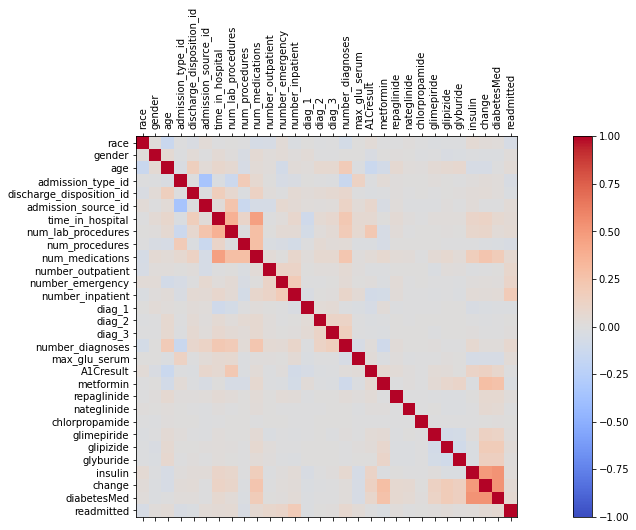

In [62]:
# Calculate correlation for the dataset

#Since acetohexamide and tolbutamide only consist of one value, they can be removed.

df = df.drop(columns=['acetohexamide','tolbutamide'])

#Visualisation

corr = df.corr()
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [67]:
#Display pairs with correlation over 0.4 for better understanding

all_data = [data for data in corr]

count = 0

for data in all_data:
    high_corr =[corr for corr in corr[data] if abs(corr) > 0.4]
    
    if len(high_corr) > 1:
        
        for number in high_corr:
            if number == 1.0:
                continue;
            else:
                for x in range(len(corr[data])):
                    if corr[data][x] == number:
                        print(f"{data} with {all_data[x]}, correlation of {number}.\n")
                        count += 1
                        
print(f"High correlation counts: {count}")

time_in_hospital with num_medications, correlation of 0.46537539016909746.

num_medications with time_in_hospital, correlation of 0.46537539016909746.

insulin with change, correlation of 0.4959641995271673.

insulin with diabetesMed, correlation of 0.5300776190058091.

change with insulin, correlation of 0.4959641995271673.

change with diabetesMed, correlation of 0.5286085527274138.

diabetesMed with insulin, correlation of 0.5300776190058091.

diabetesMed with change, correlation of 0.5286085527274138.

High correlation counts: 8


In [68]:
# Data Reduction

#Since change and diabetesMed are considered redundant, they were removed.

df = df.drop(columns=['change', 'diabetesMed'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      51766 non-null  int64  
 1   gender                    51766 non-null  int64  
 2   age                       51766 non-null  int64  
 3   admission_type_id         51766 non-null  int64  
 4   discharge_disposition_id  51766 non-null  int64  
 5   admission_source_id       51766 non-null  int64  
 6   time_in_hospital          51766 non-null  float64
 7   num_lab_procedures        51766 non-null  float64
 8   num_procedures            51766 non-null  float64
 9   num_medications           51766 non-null  float64
 10  number_outpatient         51766 non-null  float64
 11  number_emergency          51766 non-null  float64
 12  number_inpatient          51766 non-null  float64
 13  diag_1                    51766 non-null  int64  
 14  diag_2

In [70]:
#Export dataset to csv

df.to_csv("D1-preprocessed.csv")